### Import the Libraries

In [1]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

### Load the data and perform EDA

In [2]:
# Load the data
train_data = pd.read_csv('./dataset/train.csv')
test_data = pd.read_csv('./dataset/test.csv')

# Display the first few rows of the training data
print(train_data.head())

# Display the first few rows of the test data
print(test_data.head())

  PassengerId HomePlanet CryoSleep  Cabin  Destination   Age    VIP  \
0     0001_01     Europa     False  B/0/P  TRAPPIST-1e  39.0  False   
1     0002_01      Earth     False  F/0/S  TRAPPIST-1e  24.0  False   
2     0003_01     Europa     False  A/0/S  TRAPPIST-1e  58.0   True   
3     0003_02     Europa     False  A/0/S  TRAPPIST-1e  33.0  False   
4     0004_01      Earth     False  F/1/S  TRAPPIST-1e  16.0  False   

   RoomService  FoodCourt  ShoppingMall     Spa  VRDeck               Name  \
0          0.0        0.0           0.0     0.0     0.0    Maham Ofracculy   
1        109.0        9.0          25.0   549.0    44.0       Juanna Vines   
2         43.0     3576.0           0.0  6715.0    49.0      Altark Susent   
3          0.0     1283.0         371.0  3329.0   193.0       Solam Susent   
4        303.0       70.0         151.0   565.0     2.0  Willy Santantines   

   Transported  
0        False  
1         True  
2        False  
3        False  
4         True  
  

In [3]:
# Check the data types of the training data
print(train_data.dtypes)

PassengerId      object
HomePlanet       object
CryoSleep        object
Cabin            object
Destination      object
Age             float64
VIP              object
RoomService     float64
FoodCourt       float64
ShoppingMall    float64
Spa             float64
VRDeck          float64
Name             object
Transported        bool
dtype: object


In [4]:
# Define the features and target variable
TARGET_VARIABLE = 'Transported'

FEATURES = [
    'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 
    'Age', 'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck'
]

OBJECT_FEATURES = [
    'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'VIP'
]

FLOAT_FEATURES = [
    'Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck'
]

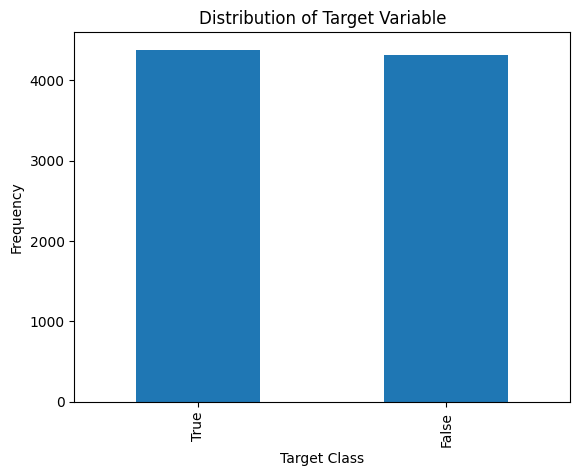

In [5]:
# Visualize the distribution of the target variable
train_data[TARGET_VARIABLE].value_counts().plot(kind='bar')
plt.title('Distribution of Target Variable')
plt.xlabel('Target Class')
plt.ylabel('Frequency')
plt.show()

In [6]:
# Percentage of missing values in each feature
missing_percentage = train_data.isnull().mean() * 100
print("Percentage of missing values in each feature:")
print(missing_percentage)

Percentage of missing values in each feature:
PassengerId     0.000000
HomePlanet      2.312205
CryoSleep       2.496261
Cabin           2.289198
Destination     2.093639
Age             2.059128
VIP             2.335212
RoomService     2.082135
FoodCourt       2.105142
ShoppingMall    2.392730
Spa             2.105142
VRDeck          2.162660
Name            2.300702
Transported     0.000000
dtype: float64


In [7]:
# Prepare the data for training
X_train = train_data[FEATURES]
y_train = train_data[TARGET_VARIABLE]

# Fill missing values for numerical features with the mean
X_train[FLOAT_FEATURES] = X_train[FLOAT_FEATURES].fillna(X_train[FLOAT_FEATURES].mean())

# Fill missing values for categorical features with the mode
X_train[OBJECT_FEATURES] = X_train[OBJECT_FEATURES].fillna(X_train[OBJECT_FEATURES].mode().iloc[0])

# Convert categorical features to numerical using one-hot encoding
X_train = pd.get_dummies(X_train, columns=OBJECT_FEATURES, drop_first=True)

C:\Users\Tamim\AppData\Local\Temp\ipykernel_14752\925895016.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train[FLOAT_FEATURES] = X_train[FLOAT_FEATURES].fillna(X_train[FLOAT_FEATURES].mean())
C:\Users\Tamim\AppData\Local\Temp\ipykernel_14752\925895016.py:9: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X_train[OBJECT_FEATURES] = X_train[OBJECT_FEATURES].fillna(X_train[OBJECT_FEATURES].mode().iloc[0])
C:\Users\Tamim\AppData\Local\Temp\ipykernel_14752\925895016.py:9: SettingWithCopyWarning: 
A value is trying to be set on a

In [8]:
# Prepre the test data
X_test = test_data[FEATURES]
X_test[FLOAT_FEATURES] = X_test[FLOAT_FEATURES].fillna(X_test[FLOAT_FEATURES].mean())
X_test[OBJECT_FEATURES] = X_test[OBJECT_FEATURES].fillna(X_test[OBJECT_FEATURES].mode().iloc[0])

# Convert categorical features to numerical using one-hot encoding
X_test = pd.get_dummies(X_test, columns=OBJECT_FEATURES, drop_first=True)

# Align the training and test data
X_train, X_test = X_train.align(X_test, join='left', axis=1, fill_value=0)

# Scale the features
scaler = StandardScaler()
X_train[FLOAT_FEATURES] = scaler.fit_transform(X_train[FLOAT_FEATURES])
X_test[FLOAT_FEATURES] = scaler.transform(X_test[FLOAT_FEATURES])

C:\Users\Tamim\AppData\Local\Temp\ipykernel_14752\2737999800.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test[FLOAT_FEATURES] = X_test[FLOAT_FEATURES].fillna(X_test[FLOAT_FEATURES].mean())
C:\Users\Tamim\AppData\Local\Temp\ipykernel_14752\2737999800.py:4: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X_test[OBJECT_FEATURES] = X_test[OBJECT_FEATURES].fillna(X_test[OBJECT_FEATURES].mode().iloc[0])
C:\Users\Tamim\AppData\Local\Temp\ipykernel_14752\2737999800.py:4: SettingWithCopyWarning: 
A value is trying to be set on a co

## TRAINING
### Logistic Regression

In [9]:
Logistic_Regression_model = LogisticRegression(max_iter=1000)

# Train the Logistic Regression model
Logistic_Regression_model.fit(X_train, y_train)

# Plot the accuracy of the Logistic Regression model
accuracy_score_lr = accuracy_score(y_train, Logistic_Regression_model.predict(X_train))
print(f"Logistic Regression Model Accuracy: {accuracy_score_lr:.4f}")

Logistic Regression Model Accuracy: 0.8607


In [10]:
# Confusion matrix for Logistic Regression
confusion_matrix_lr = confusion_matrix(y_train, Logistic_Regression_model.predict(X_train))
print("Confusion Matrix for Logistic Regression:")
print(confusion_matrix_lr)

Confusion Matrix for Logistic Regression:
[[3619  696]
 [ 515 3863]]


In [11]:
# Classification report for Logistic Regression
classification_report_lr = classification_report(y_train, Logistic_Regression_model.predict(X_train))
print("Classification Report for Logistic Regression:")
print(classification_report_lr)

Classification Report for Logistic Regression:
              precision    recall  f1-score   support

       False       0.88      0.84      0.86      4315
        True       0.85      0.88      0.86      4378

    accuracy                           0.86      8693
   macro avg       0.86      0.86      0.86      8693
weighted avg       0.86      0.86      0.86      8693



### Decision Tree

In [12]:
Decision_Tree_model = DecisionTreeClassifier()

# Train the Decision Tree model
Decision_Tree_model.fit(X_train, y_train)

# Plot the accuracy of the Decision Tree model
accuracy_score_dt = accuracy_score(y_train, Decision_Tree_model.predict(X_train))
print(f"Decision Tree Model Accuracy: {accuracy_score_dt:.4f}")

# Make predictions on the test set
predictions_dt = Decision_Tree_model.predict(X_test)

Decision Tree Model Accuracy: 0.9994


In [13]:
# Confusion Matrix for Decision Tree
confusion_matrix_dt = confusion_matrix(y_train, Decision_Tree_model.predict(X_train))
print("Confusion Matrix for Decision Tree:")
print(confusion_matrix_dt)

Confusion Matrix for Decision Tree:
[[4314    1]
 [   4 4374]]


In [14]:
# Clasification Report for Decision Tree
classification_report_dt = classification_report(y_train, Decision_Tree_model.predict(X_train))
print("Classification Report for Decision Tree:")
print(classification_report_dt)

Classification Report for Decision Tree:
              precision    recall  f1-score   support

       False       1.00      1.00      1.00      4315
        True       1.00      1.00      1.00      4378

    accuracy                           1.00      8693
   macro avg       1.00      1.00      1.00      8693
weighted avg       1.00      1.00      1.00      8693



### MLP Classifier

In [15]:
MLP_model = MLPClassifier()
MLP_model.fit(X_train, y_train)

accuracy_score_mlp = accuracy_score(y_train, MLP_model.predict(X_train))
print(f"MLP Classifier Model Accuracy: {accuracy_score_mlp:.4f}")

c:\Miniconda3\envs\machine-learning\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:780: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLP Classifier Model Accuracy: 0.9938


In [16]:
# Confusion Matrix for MLP Classifier
confusion_matrix_mlp = confusion_matrix(y_train, MLP_model.predict(X_train))
print("Confusion Matrix for MLP Classifier:")
print(confusion_matrix_mlp)

Confusion Matrix for MLP Classifier:
[[4295   20]
 [  34 4344]]


In [17]:
# Classification Report for MLP Classifier
classification_report_mlp = classification_report(y_train, MLP_model.predict(X_train))
print("Classification Report for MLP Classifier:")
print(classification_report_mlp)

Classification Report for MLP Classifier:
              precision    recall  f1-score   support

       False       0.99      1.00      0.99      4315
        True       1.00      0.99      0.99      4378

    accuracy                           0.99      8693
   macro avg       0.99      0.99      0.99      8693
weighted avg       0.99      0.99      0.99      8693



### AdaBoost Classifier

In [18]:
AdaBoost_model = AdaBoostClassifier(random_state=42)
AdaBoost_model.fit(X_train, y_train)

accuracy_score_ada = accuracy_score(y_train, AdaBoost_model.predict(X_train))
print(f"AdaBoost Classifier Model Accuracy: {accuracy_score_ada:.4f}")

AdaBoost Classifier Model Accuracy: 0.7820


In [19]:
# Confusion Matrix for AdaBoost Classifier
confusion_matrix_ada = confusion_matrix(y_train, AdaBoost_model.predict(X_train))
print("Confusion Matrix for AdaBoost Classifier:")
print(confusion_matrix_ada)

Confusion Matrix for AdaBoost Classifier:
[[3398  917]
 [ 978 3400]]


In [20]:
# Classification Report for AdaBoost Classifier
classification_report_ada = classification_report(y_train, AdaBoost_model.predict(X_train))
print("Classification Report for AdaBoost Classifier:")
print(classification_report_ada)

Classification Report for AdaBoost Classifier:
              precision    recall  f1-score   support

       False       0.78      0.79      0.78      4315
        True       0.79      0.78      0.78      4378

    accuracy                           0.78      8693
   macro avg       0.78      0.78      0.78      8693
weighted avg       0.78      0.78      0.78      8693



### Support Vector Machine (with regression) Classifier

In [21]:
Ridge_model = RidgeClassifier(max_iter=2000, random_state=42)
Ridge_model.fit(X_train, y_train)

accuracy_score_ridge = accuracy_score(y_train, Ridge_model.predict(X_train))
print(f"Ridge Classifier Model Accuracy: {accuracy_score_ridge:.4f}")

Ridge Classifier Model Accuracy: 0.9620


In [22]:
# Confusion Matrix for Ridge Classifier
confusion_matrix_ridge = confusion_matrix(y_train, Ridge_model.predict(X_train))
print("Confusion Matrix for Ridge Classifier:")
print(confusion_matrix_ridge)

Confusion Matrix for Ridge Classifier:
[[4139  176]
 [ 154 4224]]


In [23]:
# Classification Report for Ridge Classifier
classification_report_ridge = classification_report(y_train, Ridge_model.predict(X_train))
print("Classification Report for Ridge Classifier:")
print(classification_report_ridge)

Classification Report for Ridge Classifier:
              precision    recall  f1-score   support

       False       0.96      0.96      0.96      4315
        True       0.96      0.96      0.96      4378

    accuracy                           0.96      8693
   macro avg       0.96      0.96      0.96      8693
weighted avg       0.96      0.96      0.96      8693



## TESTING

In [24]:
# Make predictions on the test set using the best model (MLP Classifier in this case)
predictions = MLP_model.predict(X_test)

In [25]:
# Prepare the submission DataFrame
submission = pd.DataFrame({
    'PassengerId': test_data['PassengerId'],
    'Transported': predictions
})

# Save the submission DataFrame to a CSV file
submission.to_csv('./dataset/submission.csv', index=False)
print("Submission file created successfully: ./dataset/submission.csv")
# End of the script
print("All models trained and evaluated successfully.")
# End of the script
# Note: Ensure that the dataset paths are correct and the necessary libraries are installed.
# You can run this script in an environment where the required libraries are available.

Submission file created successfully: ./dataset/submission.csv
All models trained and evaluated successfully.
